In [2]:
! git clone https://github.com/BAltenburger/assignment4

Cloning into 'assignment4'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 26 (delta 6), reused 2 (delta 2), pack-reused 14
Receiving objects: 100% (26/26), 530.11 KiB | 6.97 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [4]:
#1
cars = pd.read_csv("./assignment4/data/cars_hw.csv")

In [5]:
# 1
cars = cars.drop(columns= ["Unnamed: 0"])
# The CSV read in with an extra index column so I removed that

In [6]:
# 1
cars["No_of_Owners"] = cars["No_of_Owners"].str.replace("st", "")
cars["No_of_Owners"] = cars["No_of_Owners"].str.replace("nd", "")
cars["No_of_Owners"] = cars["No_of_Owners"].str.replace("rd", "")
# I removed the ending to the numbers in No_of_Owners column so I could convert that row to numeric values
cars["No_of_Owners"] = pd.to_numeric(cars["No_of_Owners"])
# Now this row is only numeric values
print(cars["No_of_Owners"].unique())


# price and mileage_run needed archsine transformation because they are serval order of magnitudes larger than the other varibles
cars['price_ihs'] = np.arcsinh(cars['Price'])
cars['mileage_run_ihs'] = np.arcsinh(cars['Mileage_Run'])
cars['make_year_ihs'] = np.arcsinh(cars['Make_Year'])
display(cars)

[1 2 3]


,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,price_ihs,mileage_run_ihs,make_year_ihs
0,Volkswagen,2017,silver,sedan,44611,1,5,diesel,7-Speed,Automatic,657000,14.088586,11.398883,8.302514
1,Hyundai,2016,red,crossover,20305,1,5,petrol,5-Speed,Manual,682000,14.125932,10.611770,8.302018
2,Honda,2019,white,suv,29540,2,5,petrol,5-Speed,Manual,793000,14.276726,10.986648,8.303505
3,Renault,2017,bronze,hatchback,35680,1,5,petrol,5-Speed,Manual,414000,13.626768,11.175493,8.302514
4,Hyundai,2017,orange,hatchback,25126,1,5,petrol,5-Speed,Manual,515000,13.845069,10.824806,8.302514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,Hyundai,2018,white,sedan,23869,1,5,petrol,6-Speed,Automatic,956000,14.463660,10.773483,8.303009
972,Hyundai,2019,white,sedan,14831,1,5,petrol,6-Speed,Automatic,1027000,14.535300,10.297622,8.303505
973,Hyundai,2014,silver,sedan,52846,1,5,petrol,4-Speed,Automatic,736000,14.202133,11.568284,8.301025
974,Ford,2020,white,crossover,28335,2,5,diesel,5-Speed,Automatic,749000,14.219641,10.945000,8.304000


<Axes: ylabel='Density'>

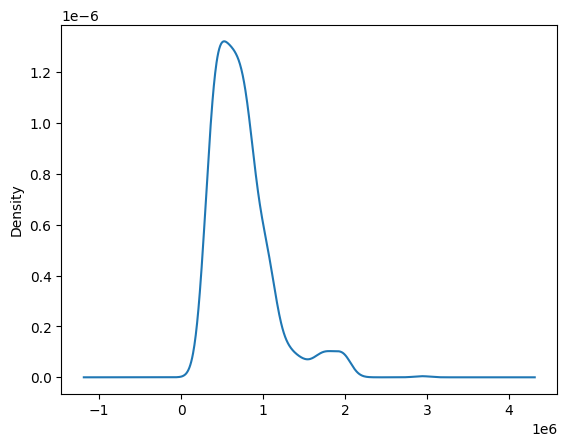

In [7]:
#2
cars["Price"].plot.density()

In [8]:
#2
cars.loc[:,['Make','Price']].groupby('Make').describe()

Price                                                    \
               count          mean           std        min        25%   
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  1.755493e+05   796000.0  1037000.0   
Maruti Suzuki  293.0  5.887850e+05  2.160199e+05   237000.0   411000.0   
Nissan           4.0  8.842500e+05  2.895599e+05   475000.0   782500.0   
Renault         68.0  6.625735e+05  2.148273e+05   287000.0   475000.0   
Skoda            5.0  1.136000e+06  1.070175e+06   436000.0   466000.0   
Tata            23.0  1.055217e+06  5.578305e+05   188000.0   779500.0   
Toyota          50.0  8.003400e+05  2.466900e+05   368000.0   526250.0   
Volkswagen      29.0  6.058276e+05  1.198312e+05   402000.0   542000.0   

                                                
                     50%        75%        max  
Make                                            
Chevrolet       345500.0   537500.0   892000.0  
Datsun          290000.0   295000.0   300000.0  
Ford            707500.0   787000.0  1066000.0  
Honda           785000.0   915000.0  1537000.0  
Hyundai         638000.0   837000.0  1742000.0  
Jeep           1529500.0  1581500.0  1649000.0  
Kia            1628500.0  1705750.0  1741000.0  
MG Motors      1848000.0  1978000.0  2019000.0  
Mahindra       1094500.0  1157000.0  1465000.0  
Maruti Suzuki   527000.0   764000.0  1163000.0  
Nissan          978000.0  1079750.0  1106000.0  
Renault         644000.0   801000.0  1164000.0  
Skoda           538000.0  1299000.0  2941000.0  
Tata            869000.0  1552000.0  2100000.0  
Toyota          894000.0  1023000.0  1092000.0  
Volkswagen      607000.0   699000.0   790000.0

<Axes: ylabel='Density'>

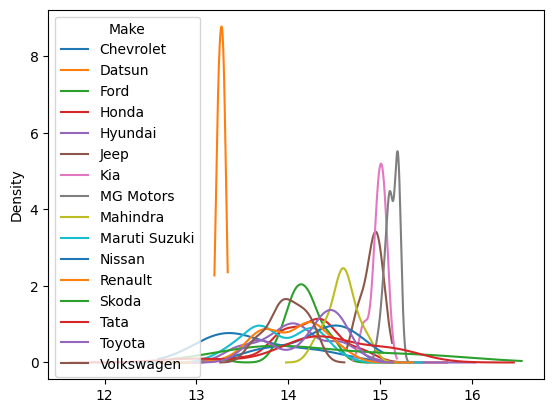

In [9]:
#2
# plot using the arcsine transform
df_wide = cars.pivot(columns='Make',values='price_ihs')
df_wide.plot.density()

<Axes: ylabel='Density'>

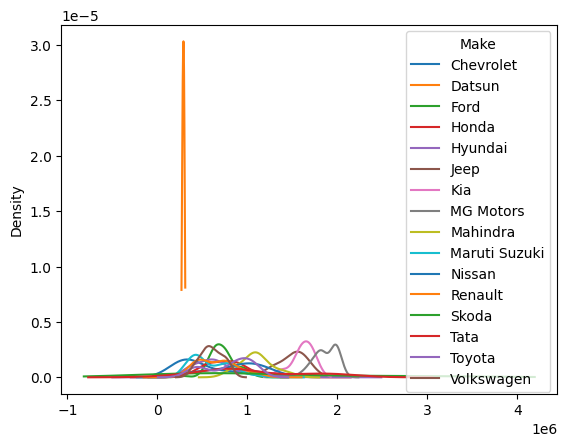

In [10]:
#2
# Plot without the adjusted price values
df_wide = cars.pivot(columns='Make',values='Price')
df_wide.plot.density()

In [11]:
# 2. Based on the graphs above and the chart of prices by make, MG Motors sells the most expensive cars. You can see this by the fact that in the
# kernel density plot grouped by Make they have the bump the highest and furthest to the right. Kia and Jeep are also expensive brands.
# Car prices in general are all pretty close to the mean, as evidence by the steap peak around the center in the first kernel density plot.
# However, there is a good portion of cars well above the mean.

In [12]:
# I am going to do the one-hot encoding before splitting the test set so I don't have to redo the changes for each question below
vars = ["Make","Color","Body_Type", "Fuel_Type","Transmission",	"Transmission_Type"]
for i in vars:
  X2 = pd.get_dummies(cars[i], dtype=float) # Create dummies

  if i == "Make":
    encoded = pd.concat([cars.reset_index(drop=True), X2.reset_index(drop=True)], axis=1)
  else:
    #X1 = pd.concat([X1,X2],axis=1)
    encoded = pd.concat([encoded.reset_index(drop=True), X2.reset_index(drop=True)], axis=1)


  encoded = encoded.drop(columns = [i])

display(encoded)
# X1_cat = X1.drop(columns = ["Mileage_Run", "No_of_Owners", "Seating_Capacity", "mileage_run_ihs", "Make_Year","make_year_ihs"])
# X1_test_cat = X1_test.drop(columns = ["Mileage_Run", "No_of_Owners", "Seating_Capacity", "mileage_run_ihs", "Make_Year","make_year_ihs"])

,Make_Year,Mileage_Run,No_of_Owners,Seating_Capacity,Price,price_ihs,mileage_run_ihs,make_year_ihs,Chevrolet,Datsun,...,diesel,petrol,petrol+cng,4-Speed,5-Speed,6-Speed,7-Speed,CVT,Automatic,Manual
0,2017,44611,1,5,657000,14.088586,11.398883,8.302514,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2016,20305,1,5,682000,14.125932,10.611770,8.302018,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2019,29540,2,5,793000,14.276726,10.986648,8.303505,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2017,35680,1,5,414000,13.626768,11.175493,8.302514,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2017,25126,1,5,515000,13.845069,10.824806,8.302514,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,2018,23869,1,5,956000,14.463660,10.773483,8.303009,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
972,2019,14831,1,5,1027000,14.535300,10.297622,8.303505,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
973,2014,52846,1,5,736000,14.202133,11.568284,8.301025,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
974,2020,28335,2,5,749000,14.219641,10.945000,8.304000,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [13]:
 #3. Split the data into an 80% training set and a 20% testing set.
y = encoded['price_ihs']
X = encoded.drop(columns = ['Price', 'price_ihs'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state =100)
print(y_train)
display(X_test)

103    13.492547
100    14.274200
518    13.960476
630    15.211260
436    13.965653
         ...    
855    13.871891
871    14.096168
835    14.360158
792    14.269131
520    13.455974
Name: price_ihs, Length: 780, dtype: float64


,Make_Year,Mileage_Run,No_of_Owners,Seating_Capacity,mileage_run_ihs,make_year_ihs,Chevrolet,Datsun,Ford,Honda,...,diesel,petrol,petrol+cng,4-Speed,5-Speed,6-Speed,7-Speed,CVT,Automatic,Manual
641,2012,23227,1,5,10.746218,8.300032,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
692,2020,7981,1,5,9.677966,8.304000,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
222,2018,60209,1,5,11.698724,8.303009,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
826,2017,49335,2,5,11.499536,8.302514,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
901,2016,64313,1,5,11.764664,8.302018,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,2014,28562,1,5,10.952980,8.301025,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
390,2016,29122,1,5,10.972396,8.302018,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
685,2018,27617,1,5,10.919334,8.303009,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
205,2016,88735,2,5,12.086557,8.302018,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [14]:
#  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set?
# Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set?
# Which model performs better on the test set?
# Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set?
# Does the joint model perform better or worse, and by home much?

In [15]:
#4 numerical model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math


vars = ['mileage_run_ihs','No_of_Owners'	,'Seating_Capacity'	, 'make_year_ihs']

X_num = X_train.loc[:,vars] # Construct data matrix
reg = LinearRegression().fit(X_num, y_train) # Fit the linear model
print("Model:")
print("Intercept:", reg.intercept_) # Intercept value
print("Coefficents:", reg.coef_) # Regression coefficients
print("R^2 and RMSE:")
X_test_num = X_test.loc[:,vars]
print("R squared:",reg.score(X_test_num, y_test)) # R squared measure
y_pred = reg.predict(X_test_num)
print("Root mean squared error:", math.sqrt(mean_squared_error(y_test, y_pred)))

Model:
Intercept: -2009.1221235063392
Coefficents: [ 1.73423935e-01 -5.08166840e-02  9.10114244e-02  2.43407617e+02]
R^2 and RMSE:
R squared: 0.4393210759745926
Root mean squared error: 0.33260224607061123


In [16]:
X_cat = X_train.drop(columns = ['mileage_run_ihs','No_of_Owners'	,'Seating_Capacity'	, 'make_year_ihs', 'Make_Year', 'Mileage_Run'])
X_test_cat = X_test
for i in X_cat.columns.to_list():
  if i not in X_test_cat.columns.to_list():
    X_test[i] = 0

X_test_cat = X_test_cat[X_cat.columns]


In [17]:
# 3 categorical model

reg = LinearRegression().fit(X_cat, y_train) # Fit the linear model
print("Model:")
print("Intercept:", reg.intercept_) # Intercept value
print("Coefficents:", reg.coef_) # Regression coefficients
print("R^2 and RMSE:")
# X_test_cat = X1_test.loc[:,vars]
print("R squared:",reg.score(X_test_cat, y_test)) # R squared measure
y_pred = reg.predict(X_test_cat)
print("Root mean squared error:", math.sqrt(mean_squared_error(y_test, y_pred)))

Model:
Intercept: -10568711770772.045
Coefficents: [-5.86179722e+12 -5.86179722e+12 -5.86179722e+12 -5.86179722e+12
 -5.86179722e+12 -5.86179722e+12 -5.86179722e+12 -5.86179722e+12
 -5.86179722e+12 -5.86179722e+12 -5.86179722e+12 -5.86179722e+12
 -5.86179722e+12 -5.86179722e+12 -5.86179722e+12 -5.86179722e+12
  7.97620482e+12  7.97620482e+12  7.97620482e+12  7.97620482e+12
  7.97620482e+12  7.97620482e+12  7.97620482e+12  7.97620482e+12
  7.97620482e+12  7.97620482e+12  7.97620482e+12  7.97620482e+12
  7.97620482e+12  7.97620482e+12  7.97620482e+12  8.44232446e+12
  8.44232446e+12  8.44232446e+12  8.44232446e+12  8.44232446e+12
  1.44725386e+13  1.44725386e+13  1.44725386e+13  2.19317537e+11
  2.19317537e+11  2.19317537e+11  2.19317537e+11  2.19317537e+11
 -1.46798765e+13 -1.46798765e+13]
R^2 and RMSE:
R squared: 0.6682827522932913
Root mean squared error: 0.2558303639945913


In [18]:
for i in X_train.columns.to_list():
  if i not in X_test.columns.to_list():
    X_test[i] = 0

X_test = X_test[X_train.columns]

In [19]:
# full model
reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print("Model:")
print("Intercept:", reg.intercept_) # Intercept value
print("Coefficents:", reg.coef_) # Regression coefficients
print("R^2 and RMSE:")
# X_test_cat = X1_test.loc[:,vars]
print("R squared:",reg.score(X_test, y_test)) # R squared measure
y_pred = reg.predict(X_test)
print("Root mean squared error:", math.sqrt(mean_squared_error(y_test, y_pred)))

Model:
Intercept: -92058.72618645536
Coefficents: [-6.17159309e+00 -1.94458808e-06 -5.97938196e-02  1.73286789e-01
  6.41794906e-02  1.25889040e+04 -3.19315528e-01 -4.44927870e-01
 -1.05650429e-01  5.44747978e-02  5.02661135e-02  1.36729286e-01
  3.24192675e-01  4.01747693e-01 -2.28696213e-01 -3.56615098e-02
 -6.73330229e-02 -2.10606561e-01  2.30240953e-01  1.71087760e-02
  1.40765009e-01  5.66658305e-02 -1.18045189e-01  5.78451121e-02
  6.06169571e-02 -3.75979533e-02  5.67271027e-02  1.35020406e-02
  1.07987894e-01  9.30019300e-03 -2.39466778e-02  4.55902387e-02
 -2.00181983e-01  2.74481425e-02  5.50194328e-03  2.73983049e-02
 -3.21461258e-02  1.68378656e-02 -1.54280142e-01 -2.71892374e-01
  1.44567728e-01  2.64766926e-01  1.34827678e-01 -5.53251739e-02
 -7.95025026e-02 -1.76004590e-01 -7.15198023e-02  4.82876657e-02
  2.02895517e-01 -3.65879278e-03  3.96096714e-02 -3.96096715e-02]
R^2 and RMSE:
R squared: 0.8374811242808018
Root mean squared error: 0.1790688179151741


In [20]:
# The joint preformace model performed better because the R^2 value is closets to one with this model. This is what we want because an R^2 of 1 means the model
# perfectly predicts the data. The RMSE is the lowest for the joint model which means the error is the lowest. THe R^2 values is almost double the R^2 of the
# numerical model.

In [21]:
#  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables.
# As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set?
# For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?

In [22]:
from sklearn.preprocessing import PolynomialFeatures
expander = PolynomialFeatures(degree=2,include_bias=False)
Z = expander.fit_transform(encoded.loc[:,['mileage_run_ihs','No_of_Owners'	,'Seating_Capacity'	, 'make_year_ihs']])
names = expander.get_feature_names_out()
X2 = pd.DataFrame(data=Z, columns = names)
X_expand = pd.concat([encoded,X2],axis=1)
# removing the columns with the not scaled values
X_expand = X_expand.drop(columns = ["Make_Year", "Mileage_Run"])
X_expand.head()

,No_of_Owners,Seating_Capacity,Price,price_ihs,mileage_run_ihs,make_year_ihs,Chevrolet,Datsun,Ford,Honda,...,mileage_run_ihs^2,mileage_run_ihs No_of_Owners,mileage_run_ihs Seating_Capacity,mileage_run_ihs make_year_ihs,No_of_Owners^2,No_of_Owners Seating_Capacity,No_of_Owners make_year_ihs,Seating_Capacity^2,Seating_Capacity make_year_ihs,make_year_ihs^2
0,1,5,657000,14.088586,11.398883,8.302514,0.0,0.0,0.0,0.0,...,129.934532,11.398883,56.994415,94.639383,1.0,5.0,8.302514,25.0,41.512569,68.931735
1,1,5,682000,14.125932,10.611770,8.302018,0.0,0.0,0.0,0.0,...,112.609654,10.611770,53.058848,88.099101,1.0,5.0,8.302018,25.0,41.510089,68.923501
2,2,5,793000,14.276726,10.986648,8.303505,0.0,0.0,0.0,1.0,...,120.706428,21.973295,54.933239,91.227683,4.0,10.0,16.607010,25.0,41.517524,68.948193
3,1,5,414000,13.626768,11.175493,8.302514,0.0,0.0,0.0,0.0,...,124.891639,11.175493,55.877464,92.784683,1.0,5.0,8.302514,25.0,41.512569,68.931735
4,1,5,515000,13.845069,10.824806,8.302514,0.0,0.0,0.0,0.0,...,117.176417,10.824806,54.124028,89.873098,1.0,5.0,8.302514,25.0,41.512569,68.931735


In [23]:
# split the new data
y = encoded['price_ihs']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_expand,y,test_size=.2,random_state =100)


In [24]:
reg = LinearRegression().fit(X_train, y_train)
print("Model:")
print("Intercept:", reg.intercept_)
print("Coefficents:", reg.coef_)
print("R^2 and RMSE:")
print("R squared:",reg.score(X_test, y_test))
y_pred = reg.predict(X_test)
print("Root mean squared error:", math.sqrt(mean_squared_error(y_test, y_pred)))

# This model was the best with the expansion. The R^2 shows that it perfectly fits the test data and the RMSE is very very small.
# The best model from the previous question had R^2 of 0.83748 and RSME of 0.17907. The RSME given in this model is many order of magnitudes smaller.
# This exapanded model might not be correct from a statisical point of view, but it does create a the best model thus far.

Model:
Intercept: -1.7173995559005562e-10
Coefficents: [ 5.92712009e-04 -1.28961148e-13  8.67361738e-19  1.00000000e+00
 -2.64959495e-13 -6.48927440e-12  2.39425342e-13 -1.06425285e-13
 -1.52308721e-13 -3.96461509e-13 -3.09240480e-13  1.41857359e-12
 -3.82027743e-13  1.54057322e-13  2.20143348e-13 -2.89095137e-13
  4.26589319e-13 -2.19435581e-13 -1.52489132e-13  1.06359366e-13
 -1.11743947e-13 -4.45699033e-13  3.46903062e-13  1.12118648e-13
  1.30145894e-13 -2.61346500e-13 -1.01058051e-13 -9.92183766e-13
 -4.96824804e-13  1.65811809e-13  1.20359452e-13  7.06656955e-14
  3.52870511e-13  1.02390318e-13  1.08899001e-13  1.03243802e-13
  2.39055303e-13 -9.12603326e-14  1.21250232e-13 -3.48925749e-13
  2.25514052e-13  9.33003674e-14  2.50910404e-14  2.00631178e-13
 -2.25805485e-13 -5.05151476e-14  3.23768790e-14  5.62674907e-14
  2.04530837e-13 -2.42722509e-13 -2.53165544e-14  2.52367571e-14
 -2.63417760e-13 -5.92711484e-04 -1.21489624e-13 -6.48931256e-12
  4.67403893e-14 -1.01030295e-13  4

In [25]:
# I started with a degree of 2 and got an R^2 of 1 and a very low RMSE
# Now I will increase the degree until I get a negative R^2

expander = PolynomialFeatures(degree=9,include_bias=False)
Z = expander.fit_transform(encoded.loc[:,['mileage_run_ihs','No_of_Owners'	,'Seating_Capacity'	, 'make_year_ihs']])
names = expander.get_feature_names_out()
X2 = pd.DataFrame(data=Z, columns = names)
X_expand = pd.concat([encoded,X2],axis=1)
# removing the columns with the not scaled values
X_expand = X_expand.drop(columns = ["Make_Year", "Mileage_Run"])
X_expand.head()

y = encoded['price_ihs']
X_train, X_test, y_train, y_test = train_test_split(X_expand,y,test_size=.2,random_state =100)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
print("Model:")
print("Intercept:", reg.intercept_) # Intercept value
print("Coefficents:", reg.coef_) # Regression coefficients
print("R^2 and RMSE:")
# X_test_cat = X1_test.loc[:,vars]
print("R squared:",reg.score(X_test, y_test)) # R squared measure
y_pred = reg.predict(X_test)
print("Root mean squared error:", math.sqrt(mean_squared_error(y_test, y_pred)))

# A degree of 9 was the first occurance of a negative value. After increasing past 3, the R^2 kept decreasing.

Model:
Intercept: 1653.3821919025854
Coefficents: [ 2.38194762e-05 -4.56484154e-02  6.91132893e-13  9.99999556e-01
  3.03525055e-03 -1.62843969e-03 -6.95677122e-04 -6.95000642e-04
 -6.95030360e-04 -6.95234523e-04 -6.95242646e-04 -6.95474957e-04
 -6.95441968e-04 -6.95265717e-04 -6.95100481e-04 -6.95272380e-04
 -6.95484658e-04 -6.95423714e-04 -6.94950701e-04 -6.95564626e-04
 -6.94860655e-04 -6.95121185e-04  2.02747995e-04  2.02800764e-04
  2.02644059e-04  2.02778538e-04  2.03121319e-04  2.02931731e-04
  2.02332418e-04  2.02938735e-04  2.02637641e-04  2.02356321e-04
  2.02458276e-04  2.02865319e-04  2.03063282e-04  2.02782942e-04
  2.02435364e-04  2.72497303e-07 -6.28174845e-08 -1.30055107e-07
 -1.62769550e-07  8.32561454e-08 -5.88893593e-09  1.60409946e-07
 -1.54334601e-07  1.26440820e-07  2.99410125e-07  1.68956938e-07
 -3.75998189e-07 -2.18179083e-07  1.76568108e-08 -1.74915844e-08
 -1.54902861e-07  2.25807960e-08  7.74733828e-10 -1.26440010e-09
 -1.08318567e-06 -3.36725021e-08 -7.1028

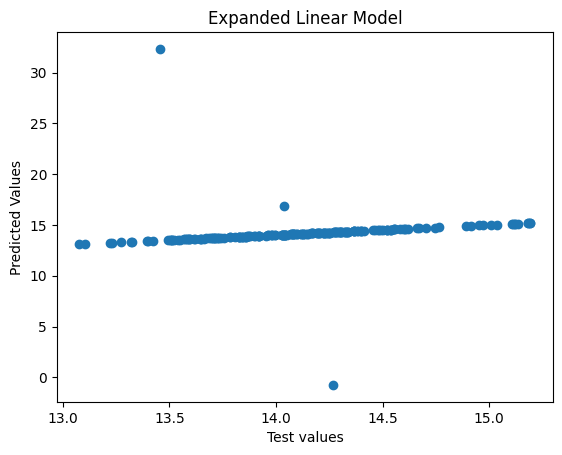

In [26]:
#  6. For your best model so far, determine the predicted values for the test data and plot them against the true values.
# Do the predicted values and true values roughly line up along the diagonal, or not?
# Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
# Evaluate the strengths and weaknesses of your model.

plt.scatter(y_test,y_pred,label='Data')

plt.xlabel("Test values")
plt.ylabel("Predicted Values")
plt.title('Expanded Linear Model')
plt.show()

# Most of the values do line up along the diagonal!

<Axes: ylabel='Density'>

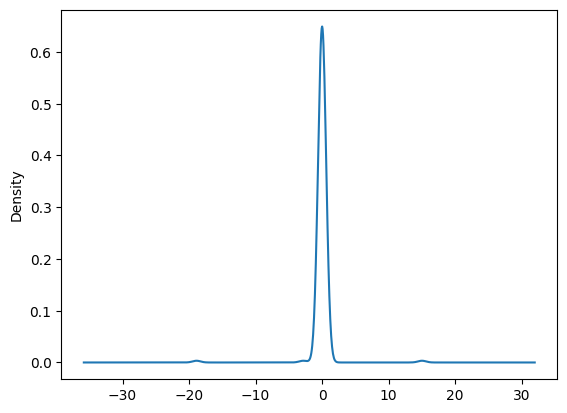

In [27]:
residuals = y_test - y_pred
residuals.plot.density()
# The residuals so not look roughly bell shaped around the center. It has a very sharp peak around the center
# This tells me this model overfits the data, which I also could tell was happening before because the R^2 is 1 for this model.

# I said this was the "best" model because it has the lowest RMSE and the highest R^2 value, but these plots show that the model overfits. As such,
# this might not be the best model to use in real life.

R^2 and RMSE:
R squared: 0.6499073123743839
Root mean squared error: 0.2628207086490888


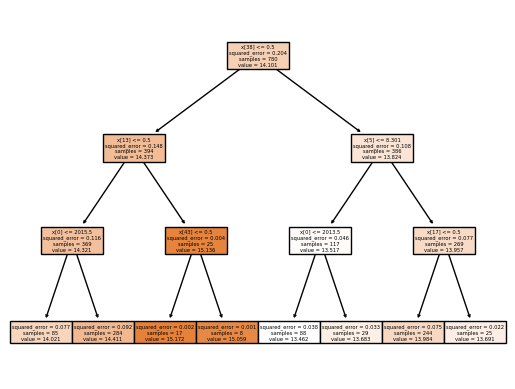

In [41]:
#   7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data.
# Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`),
# and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?

y = encoded['price_ihs']
X = encoded.drop(columns = ['Price', 'price_ihs'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state =100)


from sklearn import tree
cart = tree.DecisionTreeRegressor(max_depth =3)
cart = cart.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
print("R^2 and RMSE:")
print("R squared:",cart.score(X_test, y_test))
y_pred = cart.predict(X_test)
print("Root mean squared error:", math.sqrt(mean_squared_error(y_test, y_pred)))

R^2 and RMSE:
R squared: 0.727110808223719
Root mean squared error: 0.23203913060958342


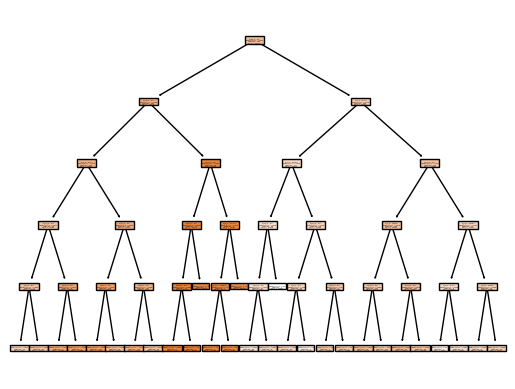

In [49]:
cart = tree.DecisionTreeRegressor(max_depth = 5)
cart = cart.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
print("R^2 and RMSE:")
print("R squared:",cart.score(X_test, y_test))
y_pred = cart.predict(X_test)
print("Root mean squared error:", math.sqrt(mean_squared_error(y_test, y_pred)))
# A tree depth 10 gave me the best results

R^2 and RMSE:
R squared: 0.773510384301298
Root mean squared error: 0.21139378240141135


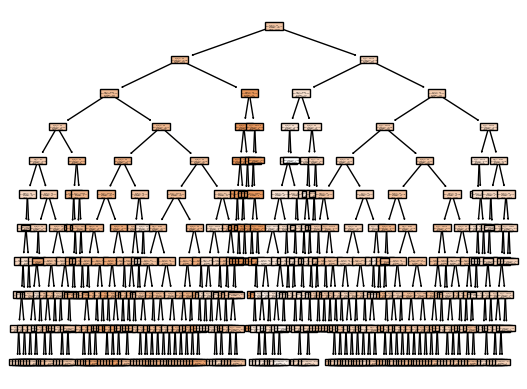

In [53]:
cart = tree.DecisionTreeRegressor(max_depth = 10)
cart = cart.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
print("R^2 and RMSE:")
print("R squared:",cart.score(X_test, y_test))
y_pred = cart.predict(X_test)
print("Root mean squared error:", math.sqrt(mean_squared_error(y_test, y_pred)))
# A tree depth 10 gave me the best results

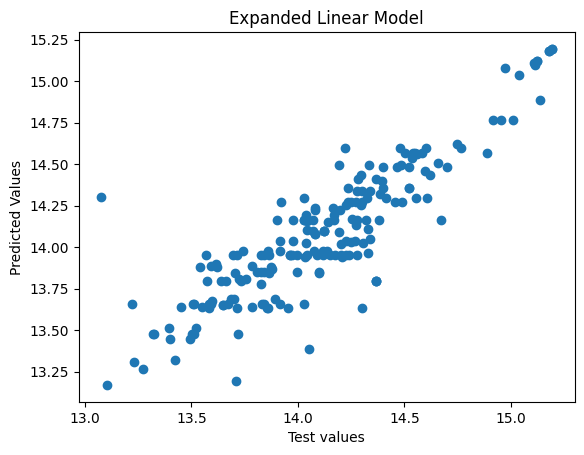

In [54]:
#   8. For your best tree, determine the predicted values for the test data, and plot them against the true values.
# Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot.
# Do the residuals look roughly bell-shaped around zero?
plt.scatter(y_test,y_pred,label='Data')

plt.xlabel("Test values")
plt.ylabel("Predicted Values")
plt.title('Expanded Linear Model')
plt.show()

# The values do line up in a roughly diagonal line. They are not as close as the other plot from the linear model, but they form a steeper diagonal.

<Axes: ylabel='Density'>

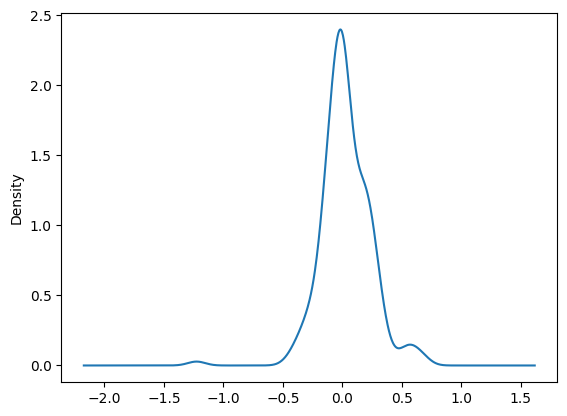

In [55]:
residuals = y_test - y_pred
residuals.plot.density()
# The curve is still not super bell shaped it. It is less symertical than the other residual plot. However, this peak is less steap which means this model
# is less overfit than the "best" model from the linear regression results.

In [30]:
#   9. Which model --- linear model or classification and regression tree --- has better performance on the test set?

# I think the linear model preformed better on the test set, but the linear model with the expanded data was too overfit. The combined linear model created
# a step before the expanded version, had a better R^2 value (0.8374811242808018) than the classification and regression tree(0.773510384301298).

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

In [31]:
df = pd.read_csv("./assignment4/data/contraception_hw.csv")
display(df)

,Unnamed: 0,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure,method
0,1,24,2,3,3,1,1,2,3,0,1
1,2,45,1,3,10,1,1,3,4,0,1
2,3,43,2,3,7,1,1,3,4,0,1
3,4,42,3,2,9,1,1,3,3,0,1
4,5,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1468,1469,33,4,4,2,1,0,2,4,0,3
1469,1470,33,4,4,3,1,1,1,4,0,3
1470,1471,39,3,3,8,1,0,1,4,0,3
1471,1472,33,3,3,4,1,0,2,2,0,3


In [32]:
df['method'].value_counts()

1    629
3    511
2    333
Name: method, dtype: int64

In [33]:
pd.crosstab(df['method'], [df['numberChildren']])

numberChildren,0,1,2,3,4,5,6,7,8,9,10,11,12,13,16
method,,,,,,,,,,,,,,,
1,95,143,114,70,57,44,35,18,29,5,9,6,4,0,0
2,0,46,56,70,62,36,27,19,9,3,2,2,0,1,0
3,2,87,106,119,78,55,30,12,9,8,0,3,0,1,1


In [34]:
# There are 95 data points of couples who use no birth control and have zero kids. There are no data points of
# couples that use short term birth contol and have no kids. However, the number of couples with 1 child is highest for the
# no birth control category. In 9 out of the 15 categories of numberChildren, the no birth control method has more data
# points than the other birth control levels. I think this evidence suggest that no birth control couples tend
# to have more kids

In [35]:
y = df['method']
X = df.drop(['method','Unnamed: 0'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state =100)

[Text(0.4230769230769231, 0.875, 'x[3] <= 0.5\nsquared_error = 0.765\nsamples = 1178\nvalue = 1.919'),
 Text(0.15384615384615385, 0.625, 'x[0] <= 17.5\nsquared_error = 0.104\nsamples = 75\nvalue = 1.053'),
 Text(0.07692307692307693, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(0.23076923076923078, 0.375, 'x[6] <= 3.5\nsquared_error = 0.053\nsamples = 74\nvalue = 1.027'),
 Text(0.15384615384615385, 0.125, 'squared_error = 0.0\nsamples = 70\nvalue = 1.0'),
 Text(0.3076923076923077, 0.125, 'squared_error = 0.75\nsamples = 4\nvalue = 1.5'),
 Text(0.6923076923076923, 0.625, 'x[0] <= 37.5\nsquared_error = 0.756\nsamples = 1103\nvalue = 1.978'),
 Text(0.5384615384615384, 0.375, 'x[3] <= 2.5\nsquared_error = 0.758\nsamples = 783\nvalue = 2.115'),
 Text(0.46153846153846156, 0.125, 'squared_error = 0.786\nsamples = 382\nvalue = 1.955'),
 Text(0.6153846153846154, 0.125, 'squared_error = 0.684\nsamples = 401\nvalue = 2.267'),
 Text(0.8461538461538461, 0.375, 'x[1] <= 2.5\nsquared

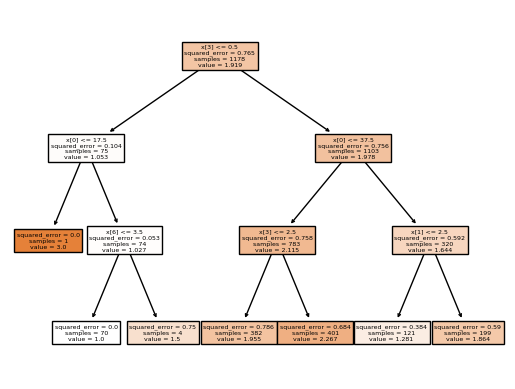

In [36]:
from sklearn import tree
cart = tree.DecisionTreeRegressor(max_depth =3)
cart = cart.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
# I had to adjust the max_depth so I could read the final depth of the tree.
# The 3 variables that were the split at the bottom where spouse_occupation (husband occupation),
# age (wife's age), and number of children
# On the face, these seem like very important variables that would contribute to if a couple uses birth control
# Often, the husbands occupation is the bread winner so that can be a good indication of the couple's wealth, if a couple has access to contraception
# The wife's age and current number of children could also greatly influence if a couple wants to use birth control

# Using the regressor is wrong, because even though these are numerical values, they are all cateogrical
# All of the split values are decimals which is not correct because decimal values are not possible with this data set

In [37]:
print(X_train)

      age  edu  edu_spouse  numberChildren  religion  working  \
1227   26    2           4               2         1        1   
784    36    4           4               4         1        1   
503    28    3           3               3         1        1   
614    38    4           4               4         0        1   
1059   25    4           4               1         1        1   
...   ...  ...         ...             ...       ...      ...   
802    33    2           3               7         1        0   
53     34    4           4               1         0        0   
350    19    2           2               2         1        1   
79     38    4           4               1         1        0   
792    30    3           3               3         1        0   

      spouse_occupation  standardOfLivingIndex  mediaExposure  
1227                  1                      4              0  
784                   1                      4              0  
503                   1    

[Text(0.4230769230769231, 0.875, 'x[3] <= 0.5\ngini = 0.647\nsamples = 1178\nvalue = [502, 269, 407]'),
 Text(0.15384615384615385, 0.625, 'x[0] <= 17.5\ngini = 0.052\nsamples = 75\nvalue = [73, 0, 2]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.23076923076923078, 0.375, 'x[6] <= 3.5\ngini = 0.027\nsamples = 74\nvalue = [73, 0, 1]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 70\nvalue = [70, 0, 0]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(0.6923076923076923, 0.625, 'x[1] <= 2.5\ngini = 0.654\nsamples = 1103\nvalue = [429, 269, 405]'),
 Text(0.5384615384615384, 0.375, 'x[0] <= 37.5\ngini = 0.562\nsamples = 367\nvalue = [207, 39, 121]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.592\nsamples = 246\nvalue = [109, 27, 110]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.326\nsamples = 121\nvalue = [98, 12, 11]'),
 Text(0.8461538461538461, 0.375, 'x[0] <= 32.5\ngini = 0.662\nsamples

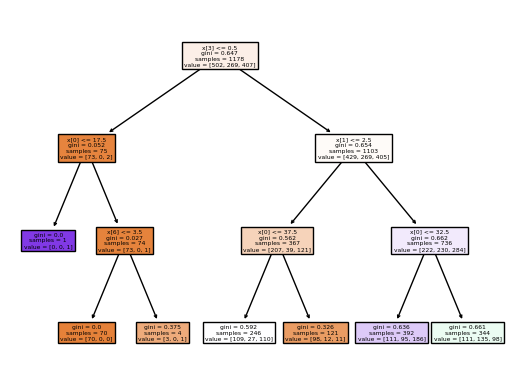

In [38]:
from sklearn import tree
cart = tree.DecisionTreeClassifier(max_depth=3)
cart = cart.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
# Again I had to adjust the max_depth so I could read the terminal nodes
# The terminal varaibles here are age and

In [39]:
y_hat = cart.predict(X_test)
tab = pd.crosstab(y_test,y_hat)
acc = (tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[2,2])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[2,2]+tab.iloc[0,1]+tab.iloc[0,2]+tab.iloc[1,0]+tab.iloc[1,2]+tab.iloc[2,0]+tab.iloc[2,1])
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy:  0.5016949152542373 



col_0,1,2,3
method,,,
1,40,37,50
2,3,38,23
3,4,30,70


In [40]:
# 6 We cannot use a linear probability model here because that type of model should be used for binary outcomes. As edvidence by the confusion
# matrix, this is not a binary model because there are 3 options for the predicted outcome. Additionally, a linear probabiliy model would not
# predict which variables split the data set. As part of this exercise was looking at what columns in the dataset split the predicted outcomes, we could
# not do this with a linear model.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?